In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
rounddf=pd.read_csv("round.csv")
userround=pd.read_csv("userround.csv")
display(rounddf)

,id,num_round,start_pot,end_pot,start_time,end_time,session_id
0,1,1,120,102,2015-12-12 11:15:35.868141,2015-12-12 11:15:47.496505,1
1,2,2,102,82,2015-12-12 11:16:02.496505,2015-12-12 11:16:13.482420,1
2,3,3,82,61,2015-12-12 11:16:28.482420,2015-12-12 11:16:40.223503,1
3,4,4,61,49,2015-12-12 11:16:55.223503,2015-12-12 11:17:07.851955,1
4,5,5,49,36,2015-12-12 11:17:22.851955,2015-12-12 11:17:33.835103,1
5,6,6,36,21,2015-12-12 11:17:48.835103,2015-12-12 11:18:03.103477,1
6,7,7,21,8,2015-12-12 11:18:18.103477,2015-12-12 11:18:27.032402,1
7,8,8,8,1,2015-12-12 11:18:42.032402,2015-12-12 11:18:53.585914,1
8,9,9,1,-5,2015-12-12 11:19:08.585914,2015-12-12 11:19:13.116412,1
9,10,10,-5,-11,2015-12-12 11:19:28.116412,2015-12-12 11:19:36.610234,1


In [5]:
oddity=[0]*max(rounddf["session_id"])
odds=0
for k in range(max(rounddf["session_id"])):
    for i in range(len(userround)):
        if ((userround.loc[i,"round_id"]-1)//10==k and userround.loc[i,"has_seleced"]==1):
            oddity[k]+=int(userround.loc[i,"option_selected"])%2
for k in range (max(rounddf["session_id"])):
    if (oddity[k]==0):
        odds+=1
print(oddity,odds)

[19, 23, 23, 26, 26, 28, 22, 19, 15, 20, 21, 9, 13, 30, 22, 22, 13, 26, 18, 22, 28, 32, 15, 15, 17, 27, 14, 17, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17] 24


In [8]:
def optionmatrix(game):
    OM=[[2 for i in range(6)] for j in range(10)]
    for j in range(10):
        for i in range(6):
            OM[j][i]=userround.loc[60*game+j*6+i,"option_selected"]
    return OM
display(optionmatrix(0))

[[4, 3, 4, 2, 2, 3],
 [3, 4, 4, 1, 4, 4],
 [4, 4, 4, 4, 2, 3],
 [3, 3, 0, 3, 1, 2],
 [2, 4, 0, 2, 1, 4],
 [2, 4, 0, 4, 2, 3],
 [4, 0, 0, 4, 1, 4],
 [3, 0, 0, 1, 0, 3],
 [3, 0, 0, 1, 1, 1],
 [0, 4, 0, 2, 0, 0]]

In [9]:
# funcions definides per quan hi ha les opcions 0,2,4
def prob1(player,round_): # p(s(t))
    p=[0.0 for i in range(3)]
    for i in range(3):
        for k in range(max(userround["round_id"])//10):
            if(oddity[k]==0):
                OM=optionmatrix(k)
                if (OM[round_][player]==2*i):
                    p[i]+=1.0
        p[i]=p[i]/odds
    return p
print("prob 1 jugador i 1 ronda:",prob1(0,5))
def prob1dt(player,round_): # p(s(t+1),s(t))
    p=[[0.0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            for k in range(max(userround["round_id"])//10):
                if(oddity[k]==0):
                    OM=optionmatrix(k)
                    if (OM[round_][player]==2*i and OM[round_+1][player]==2*j):
                        p[i][j]+=1.0
            p[i][j]=p[i][j]/odds
    return p
print("prob 1 jugador i 2 rondes:",prob1dt(0,5))
def prob2(player,round_): # p({s}(t))
    p=[[0.0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for l in range(3):
            for k in range(max(userround["round_id"])//10):
                if(oddity[k]==0):
                    OM=optionmatrix(k)
                    othersmean=0
                    for n in range(6):
                        if (n!=player):
                            othersmean+=OM[round_][n]
                    othersmean=2*round(othersmean/10)
                    if (OM[round_][player]==2*i and othersmean==2*l):
                        p[i][l]+=1.0
            p[i][l]=p[i][l]/odds
    return p
print("prob 6 jugadors i 1 ronda:",prob2(0,5))
def prob2dt(player,round_): # p({s}(t+1),{s}(t))
    p=[[[0.0 for i in range(3)] for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            for l in range(3):
                for k in range(max(userround["round_id"])//10):
                    if(oddity[k]==0):
                        OM=optionmatrix(k)
                        othersmean=0
                        for n in range(6):
                            if (n!=player):
                                othersmean+=OM[round_][n]
                        othersmean=2*round(othersmean/10)
                        if (OM[round_][player]==2*i and OM[round_+1][player]==2*j and othersmean==2*l):
                            p[i][j][l]+=1.0
                p[i][j][l]=p[i][j][l]/odds
    return p
print("prob 6 jugadors i 2 rondes:",prob2dt(0,5))
def log2(x):
    if(x==0.0):
        log2=0.0
    else:
        log2=np.log2(x)
    return log2
def transferentropy(player,round_,p1,p1dt,p2,p2dt): # definida en bits
    h=0.0
    for i in range(3):
        for j in range(3):
            if (p1dt[i][j]!=0.0 and p1[i]!=0.0):
                h+=-p1dt[i][j]*log2(p1dt[i][j]/p1[i])
            for l in range(3):
                if (p2dt[i][j][l]!=0.0 and p2[i][l]!=0.0):
                    h+=p2dt[i][j][l]*log2(p2dt[i][j][l]/p2[i][l])
    return h

prob 1 jugador i 1 ronda: [0.20833333333333334, 0.375, 0.4166666666666667]
prob 1 jugador i 2 rondes: [[0.08333333333333333, 0.08333333333333333, 0.041666666666666664], [0.125, 0.16666666666666666, 0.08333333333333333], [0.041666666666666664, 0.125, 0.25]]
prob 6 jugadors i 1 ronda: [[0.0, 0.20833333333333334, 0.0], [0.0, 0.3333333333333333, 0.041666666666666664], [0.0, 0.375, 0.041666666666666664]]
prob 6 jugadors i 2 rondes: [[[0.0, 0.08333333333333333, 0.0], [0.0, 0.08333333333333333, 0.0], [0.0, 0.041666666666666664, 0.0]], [[0.0, 0.125, 0.0], [0.0, 0.125, 0.041666666666666664], [0.0, 0.08333333333333333, 0.0]], [[0.0, 0.041666666666666664, 0.0], [0.0, 0.08333333333333333, 0.041666666666666664], [0.0, 0.25, 0.0]]]


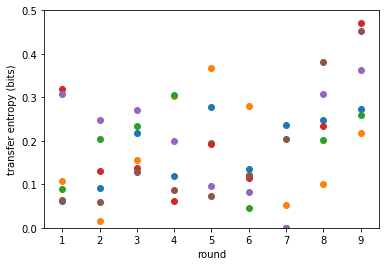

In [11]:
T=[0.0 for k in range(9)]
for n in range(6):
    for k in range(9):
        p1=prob1(n,k)
        p1dt=prob1dt(n,k)
        p2=prob2(n,k)
        p2dt=prob2dt(n,k)
        T[k]=transferentropy(n,k,p1,p1dt,p2,p2dt)
    plt.scatter(list(range(1,10)),T)
plt.xlabel("round")
plt.ylabel("transfer entropy (bits)")
plt.ylim(0.0)
plt.show()